# Explorative analysis on raw data

## Importing the required modules

In [17]:
from math import sqrt
import time
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import ppscore as pps

## Registering the start time for runtime calculation

In [18]:
start = time.time()

## Reading the data file into the Dataframe

In [3]:
sup = pd.read_csv("../data/sup.csv",sep=',',header=0)
sup

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


## Display basic stats

In [19]:
sup.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


## Display boxplot of all attributes without target

<Figure size 432x288 with 0 Axes>

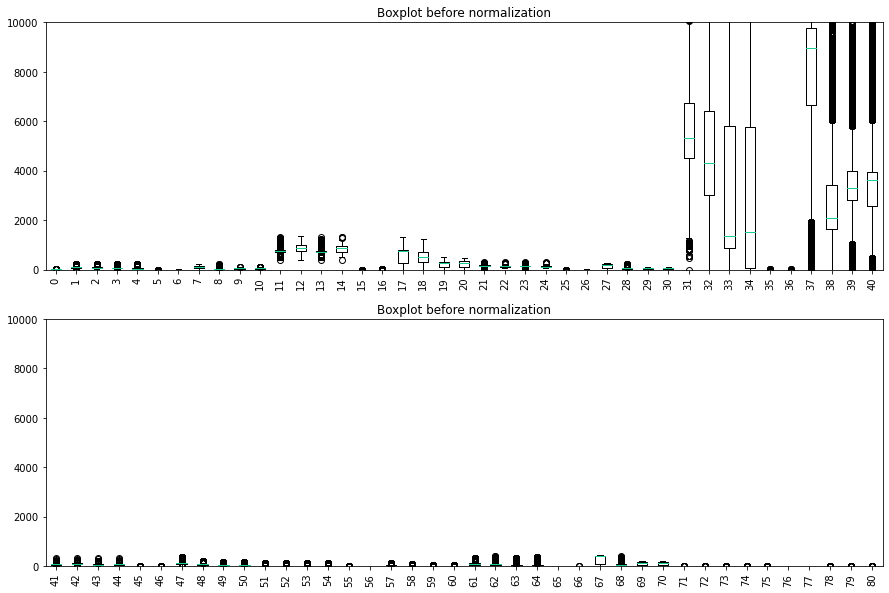

In [5]:
split = 41
endr = len(sup.columns) - 1
scale = 10000

fig = plt.figure()
fig.subplots_adjust(hspace=2.0)
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.set_title("Boxplot before normalization")
ax1.boxplot(sup.iloc[:,0:split],labels=range(0,split),medianprops=dict(color="#1ACC94"))
ax1.set_xticklabels(labels=range(0,split), rotation=90)
ax1.set_ylim(0, scale)
ax2 = fig.add_subplot(2, 1, 2)
ax2.set_title("Boxplot before normalization")
ax2.boxplot(sup.iloc[:,split:endr],labels=range(split,endr),medianprops=dict(color="#1ACC94"))
ax2.set_xticklabels(labels=range(split,endr), rotation=90)
ax2.set_ylim(0, scale)
fig.savefig('../graph/Box_raw.jpg')

<Figure size 432x288 with 0 Axes>

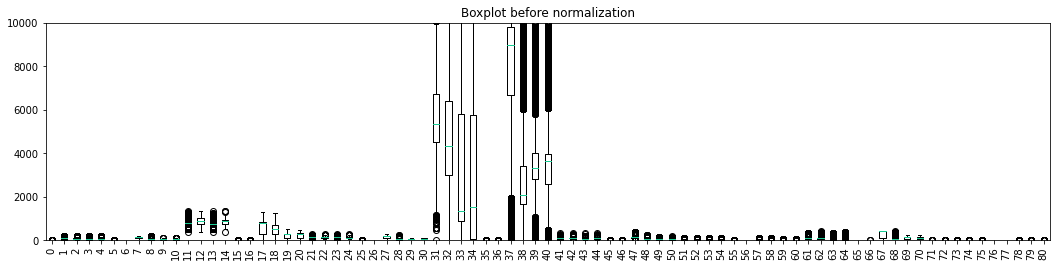

In [6]:
endr = len(sup.columns) - 1
scale = 10000

fig = plt.figure()
fig.subplots_adjust(hspace=2.0)
fig = plt.figure(figsize=(18,4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_title("Boxplot before normalization")
ax1.boxplot(sup.iloc[:,0:endr],labels=range(0,endr),medianprops=dict(color="#1ACC94"))
ax1.set_xticklabels(labels=range(0,endr), rotation=90)
ax1.set_ylim(0, scale)
fig.savefig('../graph/Box_raw_one.jpg')

## Displaying true duplicates (i.e. all attributes incl. target are identical)

In [7]:
sup[sup.duplicated(keep=False)].sort_values(by=list(sup.columns[:]))

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
12615,2,39.513500,45.227500,37.824826,43.895938,0.650720,0.431701,22.85600,31.184750,11.428000,...,4.75000,4.472136,4.728708,0.686962,0.514653,1,2.750000,0.500000,0.433013,16.6
16697,2,39.513500,45.227500,37.824826,43.895938,0.650720,0.431701,22.85600,31.184750,11.428000,...,4.75000,4.472136,4.728708,0.686962,0.514653,1,2.750000,0.500000,0.433013,16.6
12710,2,39.513500,45.227500,37.824826,43.895938,0.650720,0.431701,22.85600,31.184750,11.428000,...,4.75000,4.472136,4.728708,0.686962,0.514653,1,2.750000,0.500000,0.433013,16.7
15453,2,39.513500,45.227500,37.824826,43.895938,0.650720,0.431701,22.85600,31.184750,11.428000,...,4.75000,4.472136,4.728708,0.686962,0.514653,1,2.750000,0.500000,0.433013,16.7
10586,2,39.513500,45.227500,37.824826,43.895938,0.650720,0.431701,22.85600,31.184750,11.428000,...,4.75000,4.472136,4.728708,0.686962,0.514653,1,2.750000,0.500000,0.433013,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8503,4,76.444563,51.381751,59.356672,35.040763,1.199541,1.291294,121.32760,14.343486,43.823354,...,2.07722,2.213364,2.063611,1.368922,1.203843,1,0.841699,0.433013,0.266940,93.0
12293,4,110.876440,105.116862,100.412902,99.591609,1.294562,1.218363,130.00638,40.085502,47.134094,...,4.75000,4.728708,4.728708,1.381979,1.199572,1,1.875000,0.433013,0.433013,12.2
13021,4,110.876440,105.116862,100.412902,99.591609,1.294562,1.218363,130.00638,40.085502,47.134094,...,4.75000,4.728708,4.728708,1.381979,1.199572,1,1.875000,0.433013,0.433013,12.2
12292,4,110.876440,110.876440,100.412902,100.412902,1.294562,1.294562,130.00638,32.501595,47.134094,...,4.75000,4.728708,4.728708,1.381979,1.381979,1,0.250000,0.433013,0.433013,6.2


## Displaying attribute duplicates (i.e. all attributes identical, but target different)

In [8]:
sup[sup.duplicated(subset=list(sup.columns[:-1]), keep=False)].sort_values(by=list(sup.columns[:]))

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
17374,1,6.941000,6.941000,6.941000,6.941000,0.000000,0.000000,0.0000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.00000,0,0.000000,0.000000,0.000000,0.0004
14864,1,6.941000,6.941000,6.941000,6.941000,0.000000,0.000000,0.0000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.00000,0,0.000000,0.000000,0.000000,5.9500
14863,1,6.941000,6.941000,6.941000,6.941000,0.000000,0.000000,0.0000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.00000,0,0.000000,0.000000,0.000000,13.8000
14750,1,6.941000,6.941000,6.941000,6.941000,0.000000,0.000000,0.0000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.00000,0,0.000000,0.000000,0.000000,14.0000
14723,1,6.941000,6.941000,6.941000,6.941000,0.000000,0.000000,0.0000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.00000,0,0.000000,0.000000,0.000000,17.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,7,122.377389,104.023422,96.140122,83.837902,1.784057,1.729151,184.5906,28.924510,63.252058,...,2.437500,2.737476,2.332231,1.847534,1.85002,4,0.375000,1.414214,0.863767,64.0000
10176,7,122.710057,104.460050,96.332876,84.058587,1.783671,1.726973,184.5906,29.361138,63.480697,...,2.437500,2.737476,2.332231,1.847534,1.85002,4,0.375000,1.414214,0.863767,48.0000
9963,7,122.710057,104.460050,96.332876,84.058587,1.783671,1.726973,184.5906,29.361138,63.480697,...,2.437500,2.737476,2.332231,1.847534,1.85002,4,0.375000,1.414214,0.863767,60.0000
9748,8,115.823894,53.196266,87.838554,34.213792,1.875500,1.859646,192.9810,10.146095,69.753010,...,2.242105,2.706600,2.165123,2.016833,1.58933,3,1.036842,1.053269,0.735789,115.0000


## Display color coded absolute value correlation matrix

In [9]:
crmx = sup.corr().abs()
crmx.style.background_gradient(cmap='YlOrRd')

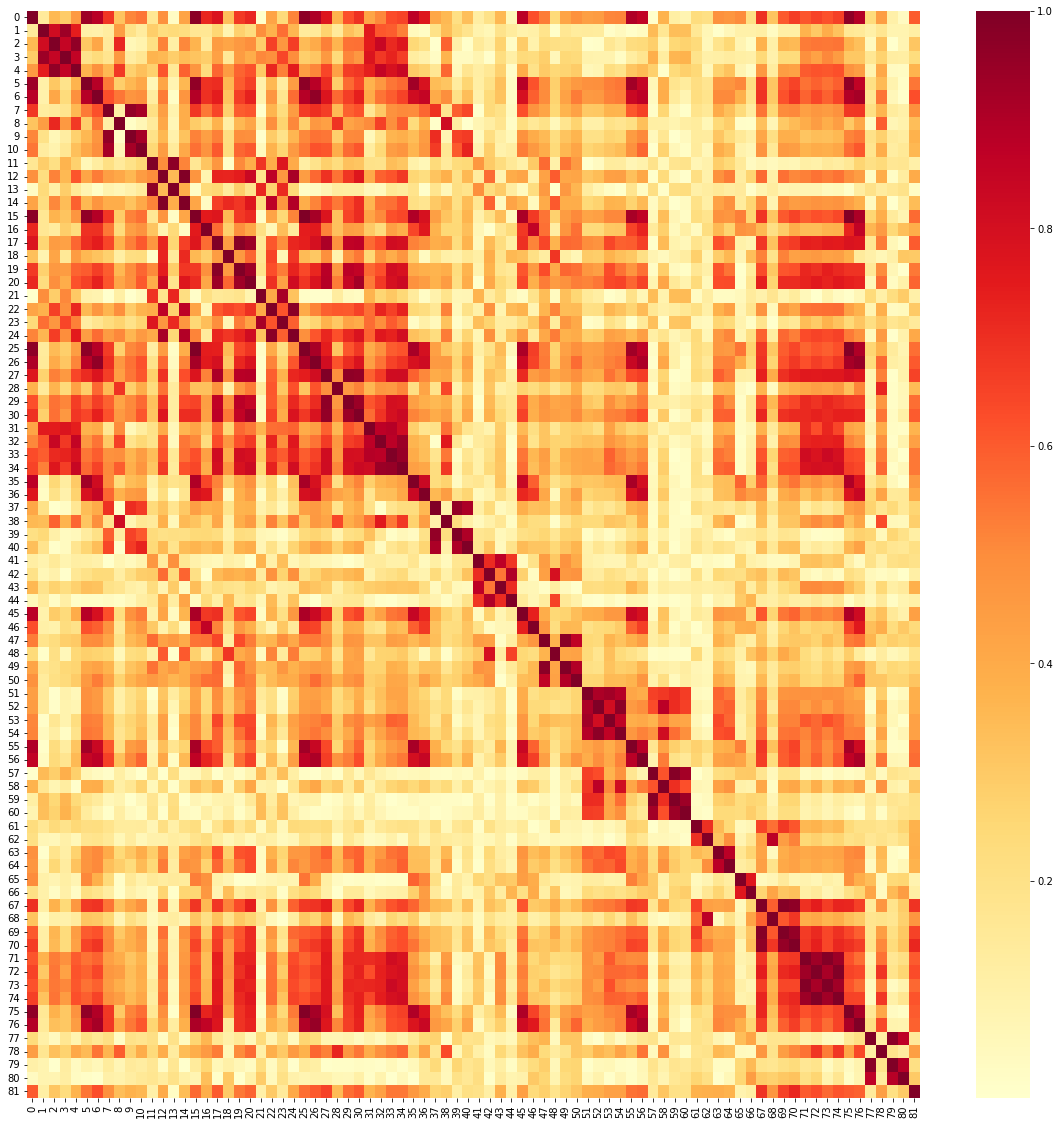

In [10]:
colnum = list(range(0,len(crmx.columns)))

fig = plt.figure(figsize=(20,20))
ax = sns.heatmap(crmx, cmap='YlOrRd', xticklabels=colnum, yticklabels=colnum)
ax.set_xticklabels(labels=colnum, rotation=90)
ax.set_yticklabels(labels=colnum, rotation=0)
fig.savefig('../graph/Corr_heatmap.jpg')

## Display color coded absolute value correlation matrix of selected attributes

Each property has 10 statistical mesures. Selecting one property as a starting point (ix = [i+j*10 for i in range(1,11) with j between 0 and 7)

Alternatively select the same statistical measure for each property (ix = [i+j for i in range(1,81,10) with j between 0 and 7)

In [11]:
ix = [i for i in range(1,81,10)]
ix.append(-1)
sup.iloc[:,ix].corr().abs().style.background_gradient(cmap='YlOrRd')

,mean_atomic_mass,mean_fie,mean_atomic_radius,mean_Density,mean_ElectronAffinity,mean_FusionHeat,mean_ThermalConductivity,mean_Valence,critical_temp
mean_atomic_mass,1.000000,0.285782,0.497664,0.756861,0.088230,0.137669,0.158266,0.374099,0.113523
mean_fie,0.285782,1.000000,0.690319,0.194406,0.466972,0.001013,0.067805,0.109749,0.102268
mean_atomic_radius,0.497664,0.690319,1.000000,0.369276,0.367738,0.144850,0.028443,0.052578,0.105273
mean_Density,0.756861,0.194406,0.369276,1.000000,0.132817,0.264720,0.073855,0.709641,0.368262
mean_ElectronAffinity,0.088230,0.466972,0.367738,0.132817,1.000000,0.104045,0.015374,0.321216,0.193550
mean_FusionHeat,0.137669,0.001013,0.144850,0.264720,0.104045,1.000000,0.040141,0.488123,0.385509
mean_ThermalConductivity,0.158266,0.067805,0.028443,0.073855,0.015374,0.040141,1.000000,0.355912,0.375813
mean_Valence,0.374099,0.109749,0.052578,0.709641,0.321216,0.488123,0.355912,1.000000,0.600085
critical_temp,0.113523,0.102268,0.105273,0.368262,0.193550,0.385509,0.375813,0.600085,1.000000


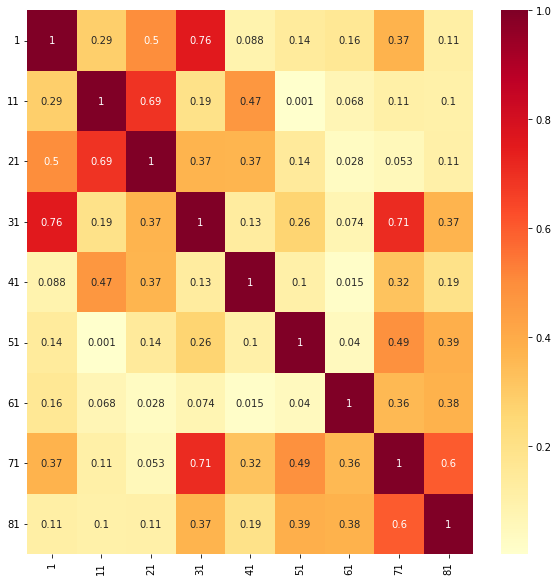

In [34]:
colnum = [list(sup.columns).index(i) for i in sup.iloc[:,ix].columns]

fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(sup.iloc[:,ix].corr().abs(), cmap='YlOrRd', annot=True, xticklabels=colnum, yticklabels=colnum)
ax.set_xticklabels(labels=colnum, rotation=90)
ax.set_yticklabels(labels=colnum, rotation=0)
fig.savefig('../graph/Corr_select_heatmap_means.jpg')

## Display scatter matrix for selected attributes plus target

Display of all 82 attributes exceeds computing resources

Each property has 10 statistical mesures. Selecting one property as a starting point (ix = [i+j*10 for i in range(1,11) with j between 0 and 7)

Alternatively select the same statistical measure for each property (ix = [i+j for i in range(1,81,10) with j between 0 and 7)

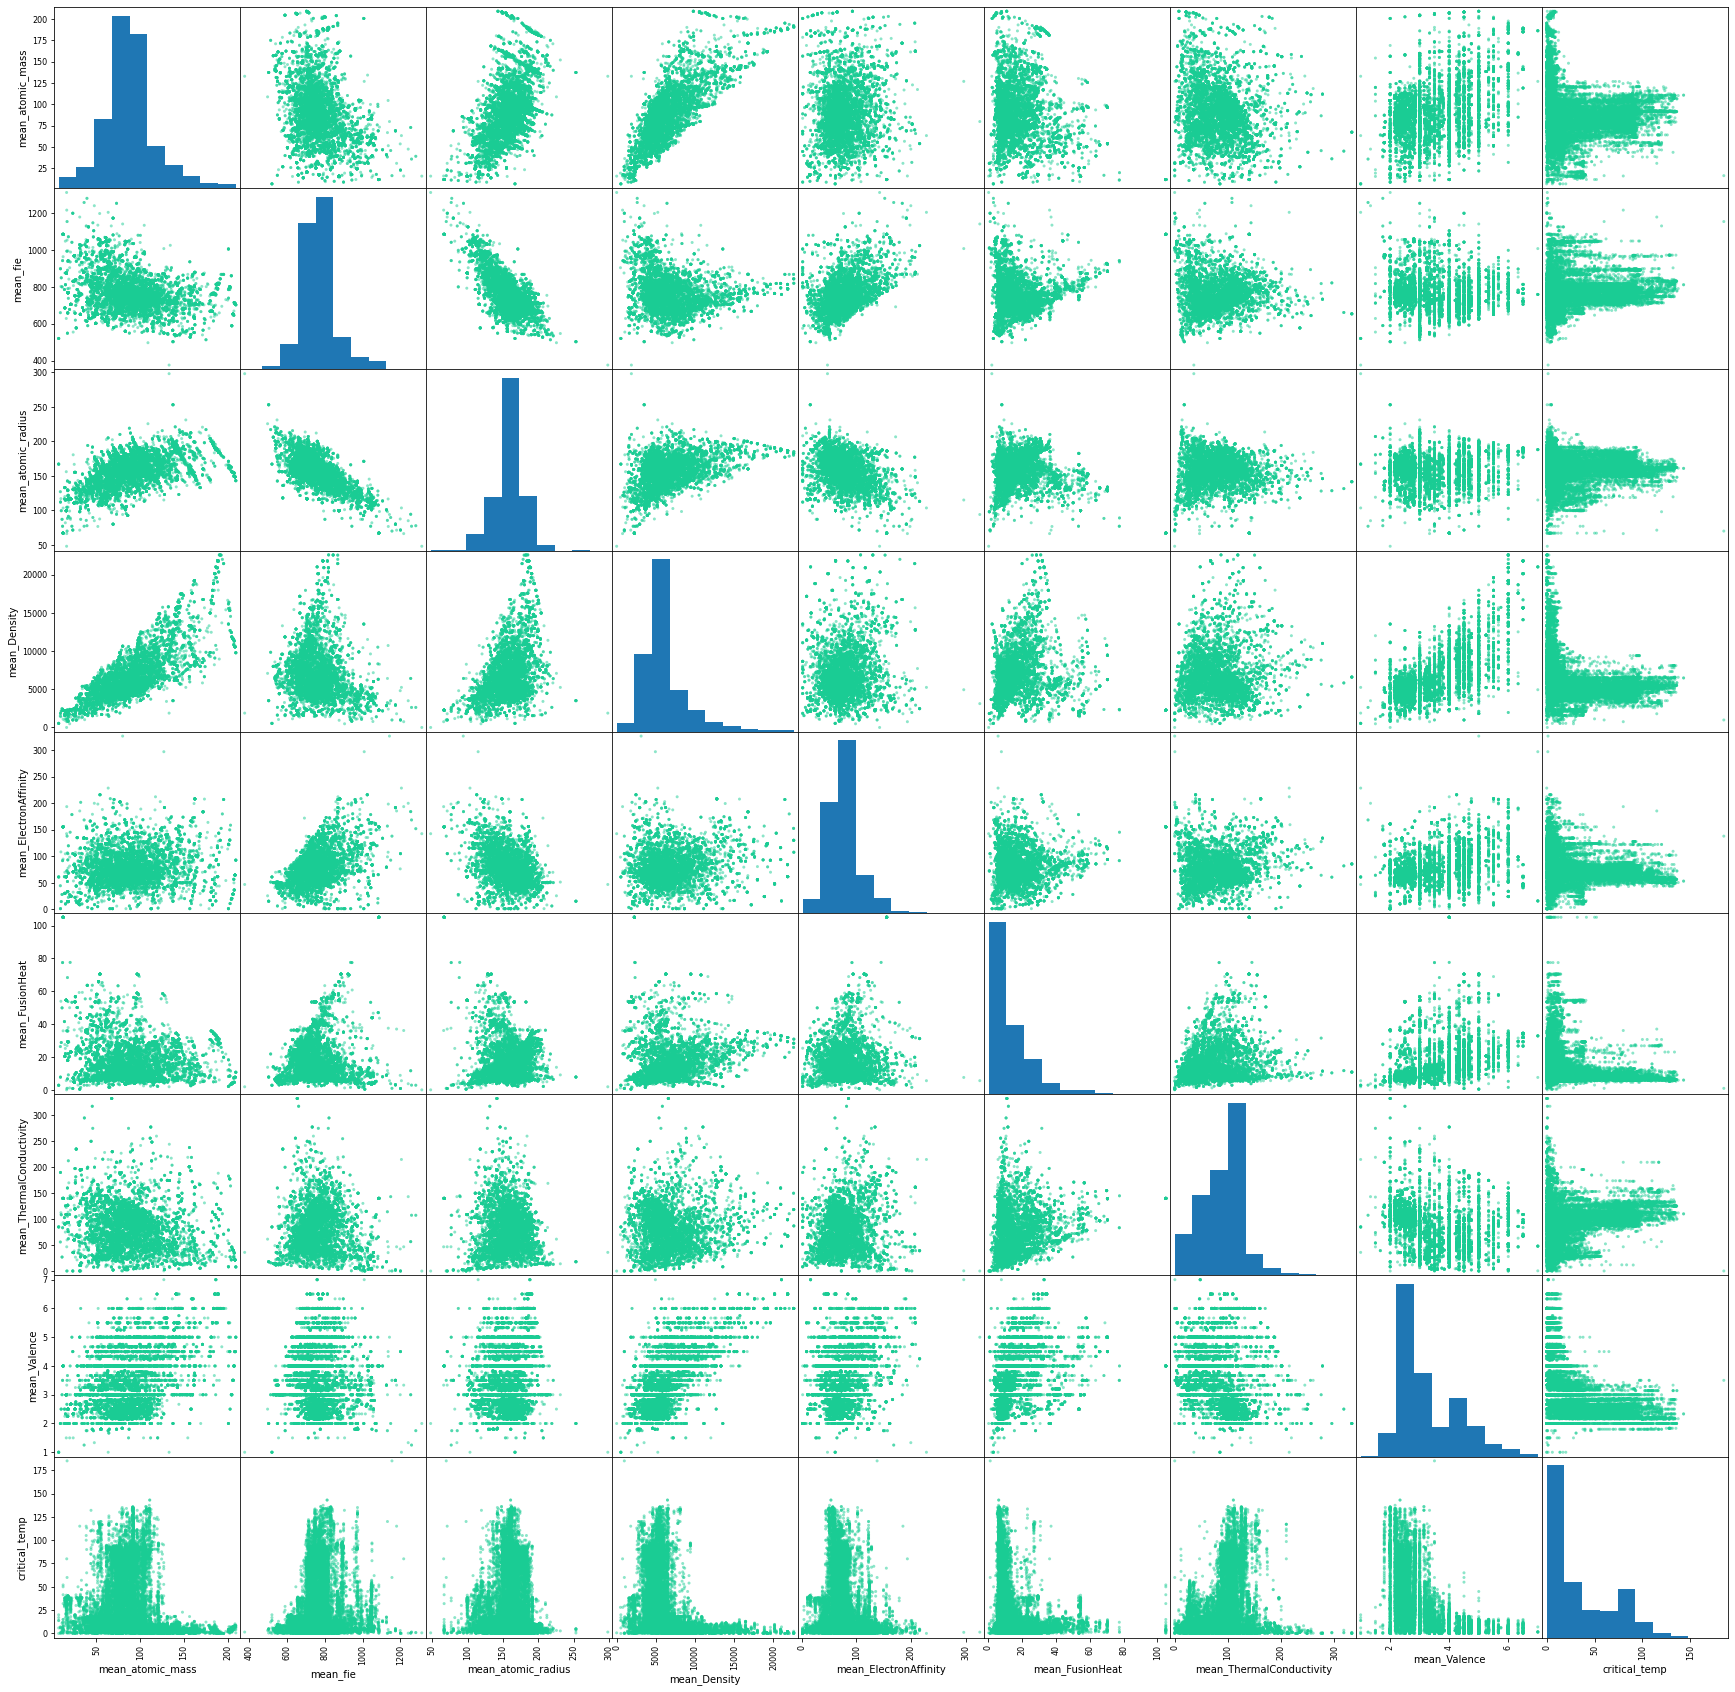

In [12]:
pd.plotting.scatter_matrix(sup.iloc[:,ix], figsize=(30,30), c="#1ACC94")
plt.savefig('../graph/Scatter_select_means.jpg')

## Display PPS Matrix

In [13]:
pps.matrix(sup.iloc[:,ix], output='list', sample=0)

[{'x': 'mean_atomic_mass',
  'y': 'mean_atomic_mass',
  'ppscore': 1,
  'case': 'predict_itself',
  'is_valid_score': True,
  'metric': None,
  'baseline_score': 0,
  'model_score': 1,
  'model': None},
 {'x': 'mean_atomic_mass',
  'y': 'mean_fie',
  'ppscore': 0.8854746905888241,
  'case': 'regression',
  'is_valid_score': True,
  'metric': 'mean absolute error',
  'baseline_score': 60.86363026092722,
  'model_score': 6.970426087520099,
  'model': DecisionTreeRegressor()},
 {'x': 'mean_atomic_mass',
  'y': 'mean_atomic_radius',
  'ppscore': 0.9092758403322286,
  'case': 'regression',
  'is_valid_score': True,
  'metric': 'mean absolute error',
  'baseline_score': 15.00397217313927,
  'model_score': 1.3612227670866854,
  'model': DecisionTreeRegressor()},
 {'x': 'mean_atomic_mass',
  'y': 'mean_Density',
  'ppscore': 0.9224352860459194,
  'case': 'regression',
  'is_valid_score': True,
  'metric': 'mean absolute error',
  'baseline_score': 1815.0533578314441,
  'model_score': 140.78409

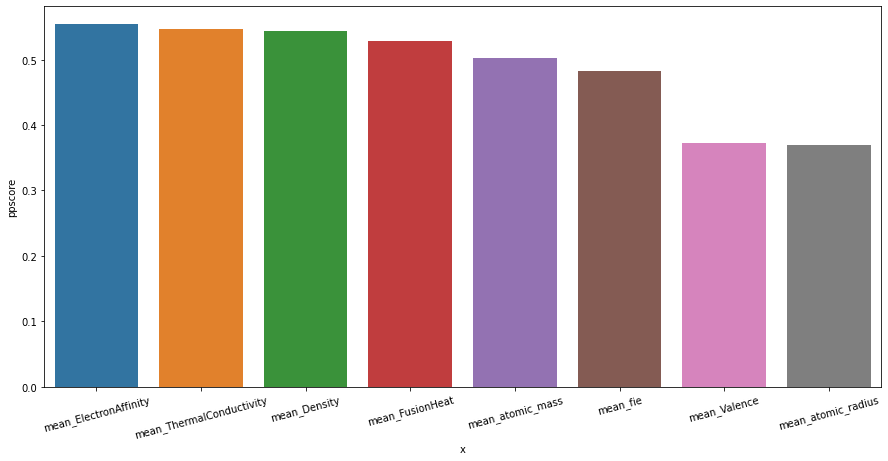

In [14]:
predictors_df = pps.predictors(sup.iloc[:,ix], y="critical_temp")
fig = plt.figure(figsize=(15,7))
sns.barplot(data=predictors_df, x="x", y="ppscore")
plt.xticks(rotation=15)
plt.savefig('../graph/PPS_predictors_means')

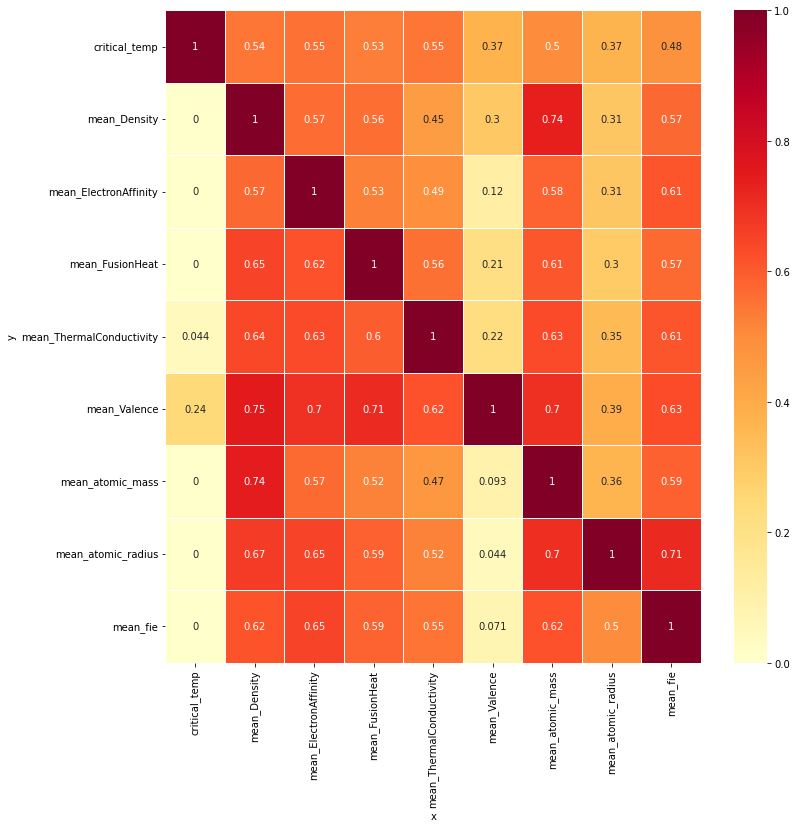

In [15]:
matrix_df = pps.matrix(sup.iloc[:,ix])[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
fig = plt.figure(figsize=(12,12))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="YlOrRd", linewidths=0.5, annot=True)
plt.savefig('../graph/PPS_matrix_means')

In [16]:
end = time.time()
runtime = end - start
print(f"Runtime = {runtime:.2f} s")

Runtime = 335.80 s
